<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/NLP/101903328_NLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP-4
Submitted by: 
+ Name: Kabir Chhabra
+ Roll no.: 101903328
+ Batch: 3CO13

# Sentiment Analysis

## Sentiment of Routine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from textblob import TextBlob

sns.set_style('darkgrid')

In [ ]:
df = pd.read_pickle('corpus.pkl')
df.head()

,Transcript,Full Name
Amer_Mohammed,[quirky flute music playing]\n [single note pi...,Amer Mohammed
Dave_2,"June 6, 2020\n 8:46 is a performance special b...",Dave Chappelle
Dave_Chappelle,[audience murmuring]\n [murmuring continues]\n...,Ch. Dave
Drew_Michael_1,“This is the latest I’ve stayed up in a long t...,Drew Michael
Drew_Michael_2,(EMOTIONAL MUSIC PLAYING)\n (MUSIC ENDS)\n DRE...,M. Drew


In [ ]:
df['polarity'] = df['Transcript'].apply(lambda x:TextBlob(x).sentiment.polarity)
df['subjecitivity'] = df['Transcript'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
df

,Transcript,Full Name,polarity,subjecitivity
Amer_Mohammed,[quirky flute music playing]\n [single note pi...,Amer Mohammed,0.072823,0.484851
Dave_2,"June 6, 2020\n 8:46 is a performance special b...",Dave Chappelle,-0.027714,0.486892
Dave_Chappelle,[audience murmuring]\n [murmuring continues]\n...,Ch. Dave,0.052754,0.544071
Drew_Michael_1,“This is the latest I’ve stayed up in a long t...,Drew Michael,0.026544,0.575368
Drew_Michael_2,(EMOTIONAL MUSIC PLAYING)\n (MUSIC ENDS)\n DRE...,M. Drew,0.047073,0.560482
Jim_Gaffigan,"Thank you! Thank you! Oh, my gosh. Thank you s...",Jim Gaffigan,0.098509,0.516245
Kathleen,[chattering]\n [man] Whoo!\n [chattering]\n [w...,Kathleen Madigan,0.032084,0.488878
Lousi,Recorded at the Madison Square Garden on Augus...,Louis C.K.,0.059700,0.559895
Phil,[hip-hop music playing]\n [audience cheering a...,Phil Wang,0.061261,0.471710
Tom,aired December 2016\n [plodding music]\n ♪\n P...,Tom Papa,0.096297,0.504067


+ Polarity lies between [-1,1], where -1 is a negative sentiment and 1 is a positive sentiment.

+ Subjectivity lies between [0,1], it quantifies the amount of personal opinion and factual information contained in the text. Higher subjectivity means that the text  contains personal information rather than factual information.

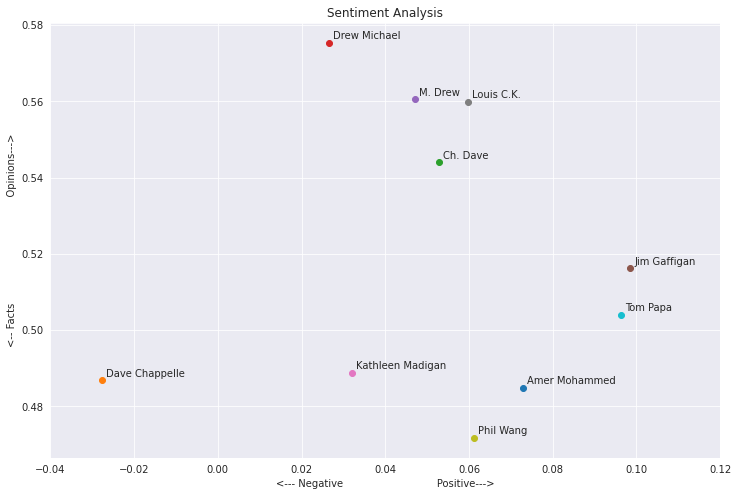

In [ ]:
plt.figure(figsize=(12,8))

for i in range(len(df)):
  x = df.polarity[i]
  y = df.subjecitivity[i]

  plt.scatter(x,y)
  plt.text(x+0.001, y+0.001, df['Full Name'][i]) 
  plt.xlim(-0.04, 0.12)

plt.title('Sentiment Analysis')
plt.xlabel('<--- Negative                              Positive--->')
plt.ylabel('<-- Facts                                  Opinions--->')
plt.show()

**Sentiment of Routine over Time**

In [ ]:
def split_text(text, n=10):
  length = len(text)
  # print(length)
  size = length//n  # floor division and 10=> no. of comedians
  # print(size)
  start = np.arange(0,length,size)
  split_list = []
  for p in range(n):
    split_list.append(text[start[p]:start[p]+size])
    # print(text[start[p]:start[p]+size])
  
  return split_list

In [ ]:
list_pieces = []
for t in df.Transcript:
  split = split_text(t)
  list_pieces.append(split)

# list_pieces

In [ ]:
polarity_text = []
for i in list_pieces:
  polarity_piece = []
  for p in i:
    polarity_piece.append(TextBlob(p).sentiment.polarity)
  polarity_text.append(polarity_piece)

# polarity_text

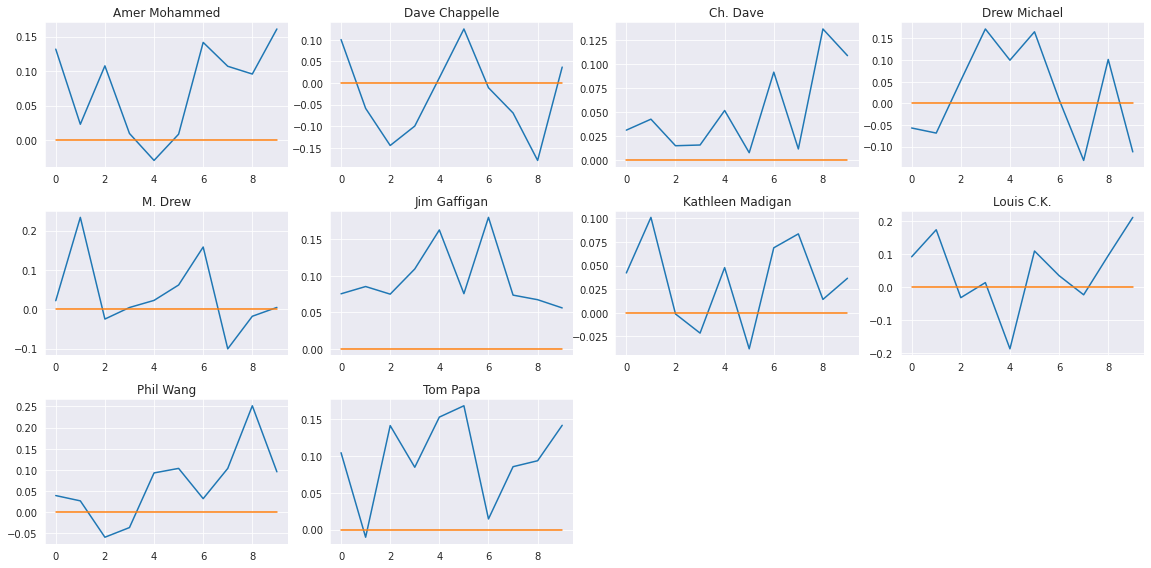

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(df)):
  plt.subplot(3,4,i+1)
  plt.plot(polarity_text[i])
  plt.plot(np.arange(0,10), np.zeros(10))
  plt.title(df['Full Name'][i])
  
plt.tight_layout()
plt.show()

# Assignment

+ Classify all comedian according to Polarity and Subjectivity
+ Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian according to Polarity and Subjectivity.

In [ ]:
list_pieces = []
for t in df.Transcript:
  split = split_text(t,15)
  list_pieces.append(split)

# list_pieces

In [ ]:
polarity_text = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_text.append(polarity_piece)
    
# polarity_text

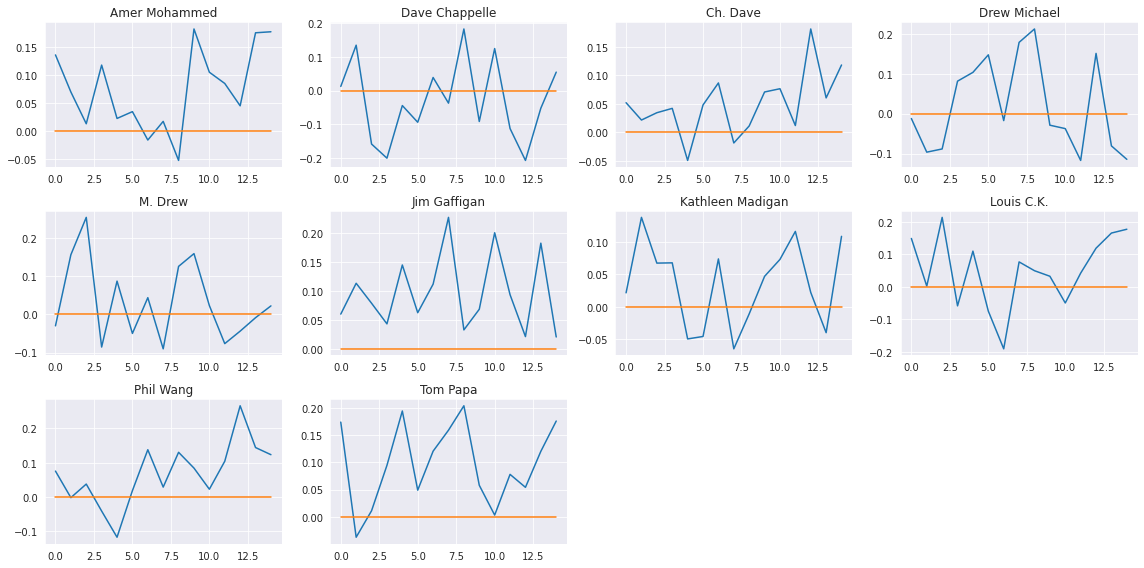

In [ ]:
plt.figure(figsize=(16,8))
for index in range(len(df.index)):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_text[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(df['Full Name'][index])
    
plt.tight_layout()
plt.show()